<a href="https://colab.research.google.com/github/Kelzo8/AI/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [14]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Helps visualize whether sleep duration impacts sleep quality.

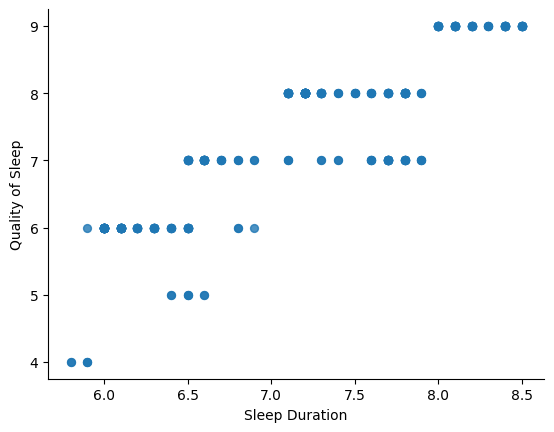

In [15]:
#Sleep Duration vs Quality of Sleep

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Sleep Duration', y='Quality of Sleep', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Shows how sleep duration is distributed among individuals.

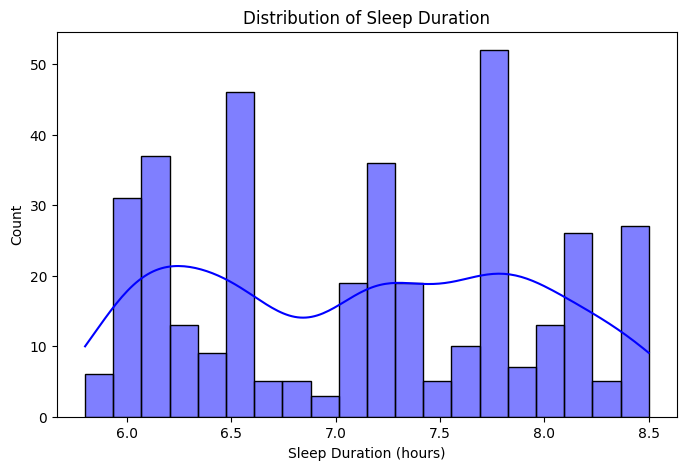

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Sleep Duration"], bins=20, kde=True, color="blue")
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Count")
plt.show()


Helps see how stress affects sleep duration.

<ipython-input-17-2258a39084fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Stress Level", y="Sleep Duration", palette="coolwarm")


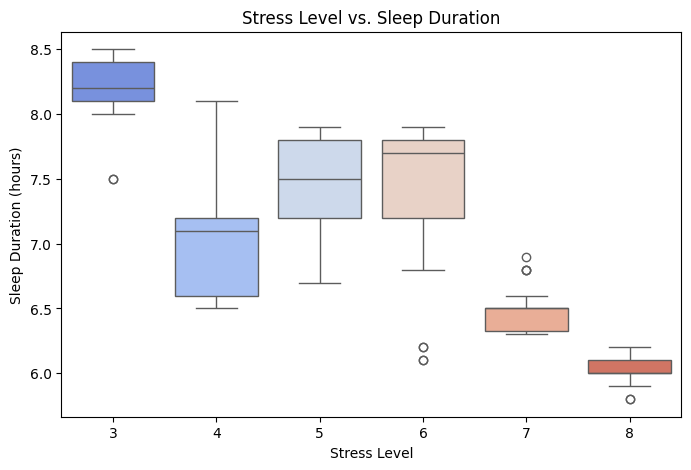

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Stress Level", y="Sleep Duration", palette="coolwarm")
plt.title("Stress Level vs. Sleep Duration")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration (hours)")
plt.show()


Displays how sleep disorders vary between genders

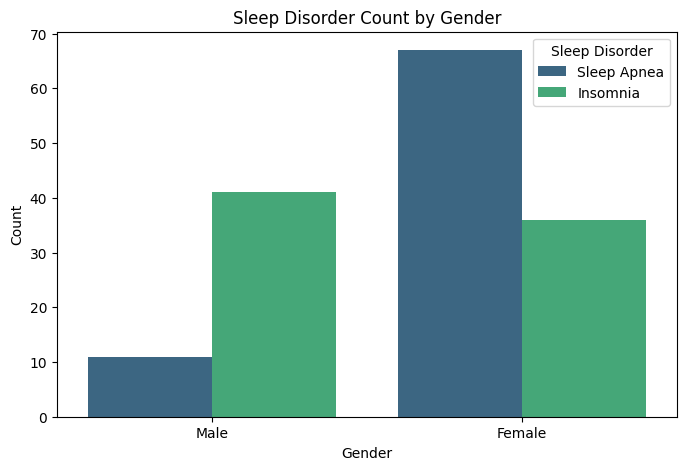

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Gender", hue="Sleep Disorder", palette="viridis")
plt.title("Sleep Disorder Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Sleep Disorder")
plt.show()




```
# This is formatted as code
```

James Kelly- graphs with data before cleaning and finding outliers, add to report


Andrew

James Doherty

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj
